# 여성 방문객 비율(female_share)이 높을수록, 관광 성장률(growth)이 높다.

2024년 변수 |||||||||||||||||||||||| 2019년 변수

국적,D_NAT  ||||||||||||||||||||||||| D_COU1

성별,D_SEX  ||||||||||||||||||||||||||| D_GEN


대상 국가 코드,

"일본: 2, 대만: 3, 홍콩: 5",

"일본: 2, 대만: 3, 홍콩: 5"

데이터 로드

In [ ]:
%%capture
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np

# 1. 파일 로드
df_2024 = pd.read_csv('/content/외래관광객조사_DATA_2024.csv')
df_2019 = pd.read_csv('/content/DATA_2019_외래관광객조사_외부용.csv')

# 2. 변수 연결 및 정의
NATION_COL_2024 = 'D_NAT'
SEX_COL_2024 = 'D_SEX'
EXP_COL_2024 = '총액1인TOT2'

NATION_COL_2019 = 'D_COU1'
SEX_COL_2019 = 'D_GEN'
EXP_COL_2019 = 'Q14_1T'

# 근거리 3개국 코드 (일본=2, 대만=3, 홍콩=5)
target_nations = [2, 3, 5]
nation_map = {2: 'Japan', 5: 'Hong Kong', 3: 'Taiwan'}

2024 데이터 전처리 (필터링 및 단위 조정)

In [ ]:
df_2024_filtered = df_2024[df_2024[NATION_COL_2024].isin(target_nations)].copy()

# 1000을 곱하여 원화 단위로 조정
df_2024_filtered['Adj_Exp'] = df_2024_filtered[EXP_COL_2024] * 1000
df_2024_filtered['Adj_Exp_K'] = df_2024_filtered['Adj_Exp'] / 1000 # K 단위는 출력용

# 2024년 평균 지출액 및 여성 비율 계산
exp_2024_stats = df_2024_filtered.groupby(NATION_COL_2024).agg(
    Avg_Exp_2024=('Adj_Exp', 'mean'),
    Avg_Exp_2024_K=('Adj_Exp_K', 'mean'),
    Female_Share_2024=(SEX_COL_2024, lambda x: (x == 2).sum() / x.count() * 100)
).reset_index().rename(columns={NATION_COL_2024: 'D_COU1'})

2019년 데이터 전처리 (필터링 및 단위 조정)

In [ ]:
# NaN 값은 제외
df_2019_filtered = df_2019[
    df_2019[NATION_COL_2019].isin(target_nations) &
    df_2019[EXP_COL_2019].notna()
].copy()

# 1000을 곱하여 원화 단위로 조정
df_2019_filtered['Adj_Exp'] = df_2019_filtered[EXP_COL_2019] * 1000
df_2019_filtered['Adj_Exp_K'] = df_2019_filtered['Adj_Exp'] / 1000

# 2019년 평균 지출액 계산
exp_2019_stats = df_2019_filtered.groupby(NATION_COL_2019).agg(
    Avg_Exp_2019=('Adj_Exp', 'mean'),
    Avg_Exp_2019_K=('Adj_Exp_K', 'mean')
).reset_index()

성장률 계산 (2019 -> 2024)

In [ ]:
exp_growth_analysis = pd.merge(exp_2024_stats, exp_2019_stats, on='D_COU1', how='inner')

# 지출액 성장률 (%) 계산
exp_growth_analysis['Growth_Rate'] = (exp_growth_analysis['Avg_Exp_2024'] / exp_growth_analysis['Avg_Exp_2019'] - 1) * 100

# 최종 테이블 정리
exp_growth_analysis['Country'] = exp_growth_analysis['D_COU1'].map(nation_map)

final_table = exp_growth_analysis[[
    'Country', 'Avg_Exp_2024_K', 'Avg_Exp_2019_K', 'Growth_Rate', 'Female_Share_2024'
]].sort_values(by='Growth_Rate', ascending=False)


print("--- 2019년/2024년 컬럼 연결 정보 ---")
print(f"2024년 국적: {NATION_COL_2024}, 2019년 국적: {NATION_COL_2019}")
print(f"2024년 성별: {SEX_COL_2024}, 2019년 성별: {SEX_COL_2019}")
print(f"2024년 지출액: {EXP_COL_2024}, 2019년 지출액: {EXP_COL_2019} (모두 x1000 조정)")

print("\n--- 관광 지출액 성장률 및 여성 비율 최종 비교 (2019 vs 2024) ---")
print(final_table.to_markdown(floatfmt=(None, ",.0f", ",.0f", ".1f", ".1f")))

--- 2019년/2024년 컬럼 연결 정보 ---
2024년 국적: D_NAT, 2019년 국적: D_COU1
2024년 성별: D_SEX, 2019년 성별: D_GEN
2024년 지출액: 총액1인TOT2, 2019년 지출액: Q14_1T (모두 x1000 조정)

--- 관광 지출액 성장률 및 여성 비율 최종 비교 (2019 vs 2024) ---
|    | Country   |   Avg_Exp_2024_K |   Avg_Exp_2019_K |   Growth_Rate |   Female_Share_2024 |
|---:|:----------|-----------------:|-----------------:|--------------:|--------------------:|
|  2 | Hong Kong |            1,793 |           1072.2 |          67.2 |             68.705  |
|  1 | Taiwan    |            1,491 |           2150.9 |         -30.7 |             66.4615 |
|  0 | Japan     |              989 |           2269.4 |         -56.4 |             68.56   |


- Avg_Exp_2024_K : 2024년 1인당 평균 총 지출액(K: 금액이 천 원 단위임)
- Avg_Exp_2019_K : 2019년 1인당 평균 총 지출액
- Grouth_Rate : 관광 지출액 성장률
- Female_Share_2024: 2024 여성 방문객 비율 (전체 응답자 중 여성이 차지하는 비율)
- 데이터 정렬: 지출액 성장률 기준 내림차순

통계 분석

In [ ]:
data = {
    'Country': ['Hong Kong', 'Taiwan', 'Japan'],
    'Growth_Rate': [67.2, -30.7, -56.4],
    'Female_Share_2024': [68.705, 66.4615, 68.56],
    'Avg_Exp_2024_K': [1793, 1491, 989]
}
#상관관계 분석
df_corr = pd.DataFrame(data)

# 1. 여성 비율 vs 성장률 상관관계 계산
correlation_female = df_corr['Growth_Rate'].corr(df_corr['Female_Share_2024'])

# 2. 2024년 평균 지출액 vs 성장률 상관관계 계산
correlation_exp = df_corr['Growth_Rate'].corr(df_corr['Avg_Exp_2024_K'])

print("--- Pearson 상관계수 분석 결과 (r) ---")
print(f"여성 비율 (Female Share) vs 성장률: {correlation_female:.2f}")
print(f"평균 지출액 (Avg Exp) vs 성장률: {correlation_exp:.2f}")

--- Pearson 상관계수 분석 결과 (r) ---
여성 비율 (Female Share) vs 성장률: 0.37
평균 지출액 (Avg Exp) vs 성장률: 0.89


[피어슨 상관계수]

1. 여성 비율

- 상관계수(r) : 0.37

- 약한 양의 상관관계. 여성 비율 만으로는 관광 성장률을 설명하기 어려움

2. 평균 지출액

- 상관계수(r) : 0.89

- 매우 강한 양의 상관관계 지출액이 높을수록 성장이 강하게 발생함

```
통계적 결론: 여성 비율 그 자체보다는 여성 비율이 노은 시장의 강력한 구매력이 2019년 대비 2024년 지출액 성장의 진짜 원인!


```
결과상, 여성 방문객 비율이 높을수록, 관광 성장률이 높다라는 가설은

홍콩에서는 가설이 검증이 되지만, 일본과 대만에서는 검증이 되지 않고 기각됨

홍콩의 경우 2024년에도 1,793천 원이라는 높은 지출액을 유지하며 성장률이 67.2를 보여줬으나, 지출액이 낮은 일본은 성장률이 대폭 하락함.
```

[보완 분석]

# 마지막으로 충성 고객으로 유지할 수 있는지 (홍콩 재방문 의사 + 한국여행 만족도)

- 재방문 의사(Q13) : 2024년 방문 후 한국을 다시 찾을 의향이 얼마나 높은지 확인(충성도)
- 타인 추천 의향(Q14): 입소문을 통해 성장할 잠재력(홍보력)이 있는지!

In [ ]:
import pandas as pd
import numpy as np

# 1. 파일 로드
df_2024 = pd.read_csv('/content/외래관광객조사_DATA_2024.csv')

# 2. 변수 연결 및 정의
NATION_COL_2024 = 'D_NAT'
SEX_COL_2024 = 'D_SEX'
EXP_COL_2024 = '총액1인TOT2'
target_nations = [2, 3, 5] # 일본=2, 대만=3, 홍콩=5
nation_map = {2: 'Japan', 5: 'Hong Kong', 3: 'Taiwan'}

# 3. 2024년 데이터 전처리
df_processed = df_2024[df_2024[NATION_COL_2024].isin(target_nations)].copy()

# 1000을 곱하여 원화 단위로 조정
spending_cols_to_adjust = [col for col in df_processed.columns if '1인대체' in col or 'TOT2' in col]
for col in spending_cols_to_adjust:
    # 안전한 조정을 위해 float 타입으로 변환 후 처리
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').apply(lambda x: x * 1000 if pd.notna(x) else x)

# 4. 20대(2) 및 30대(3) 여성(2) 필터링 (주력 타겟층: df_young_female 생성)
target_ages = [2, 3]
df_young_female = df_processed[
    (df_processed[SEX_COL_2024] == 2) &
    (df_processed['D_AGE'].isin(target_ages))
].copy()

충성도 분석 (재방문 및 추천 의향)

In [ ]:
future_intent_cols = ['Q13', 'Q14'] # 5점 척도 (5점 만점)
future_intent = df_young_female.groupby('D_NAT')[future_intent_cols].mean()
future_intent['Country'] = future_intent.index.map(nation_map)

print("--- 1. 충성도 분석: 20~30대 여성의 미래 방문 의사 (5점 척도 평균) ---")
print(future_intent[['Country', 'Q13', 'Q14']].set_index('Country').sort_values(by='Q13', ascending=False).to_markdown(floatfmt=".2f"))

--- 1. 충성도 분석: 20~30대 여성의 미래 방문 의사 (5점 척도 평균) ---
| Country   |   Q13 |   Q14 |
|:----------|------:|------:|
| Japan     |  4.65 |  4.65 |
| Taiwan    |  4.53 |  4.52 |
| Hong Kong |  4.53 |  4.54 |


[인사이트]

모든 시장이 '충성도' 측면에서 우수함

- 높은 충성도: 5점 만점에 4.5점 이상으로, 한국 여행에 대한 재방문 및 추천의사가 높음.
- 일본이 미세하게 높음.

 쇼핑 만족도와 지출액 상관관계 분석

In [ ]:
# 총액1인TOT2는 이미 x1000 조정된 상태이므로 그대로 사용
df_corr_shopping = df_young_female[['D_NAT', 'Q12a02', '총액1인TOT2']].dropna()

print("\n--- 2. 쇼핑 만족도와 총 지출액 상관관계 (Pearson r) ---")

# 각 국가별 상관계수 계산
corr_results = {}
for country_code, country_name in nation_map.items():
    df_country = df_corr_shopping[df_corr_shopping['D_NAT'] == country_code]
    if len(df_country) > 1:
        corr = df_country['Q12a02'].corr(df_country['총액1인TOT2'])
        corr_results[country_name] = corr

# 결과 출력
df_corr_summary = pd.DataFrame(list(corr_results.items()), columns=['Country', 'Correlation_r'])
df_corr_summary['Correlation_r_Abs'] = df_corr_summary['Correlation_r'].abs()
df_corr_summary = df_corr_summary.sort_values(by='Correlation_r_Abs', ascending=False)
print(df_corr_summary.to_markdown(floatfmt=".3f", index=False))


--- 2. 쇼핑 만족도와 총 지출액 상관관계 (Pearson r) ---
| Country   |   Correlation_r |   Correlation_r_Abs |
|:----------|----------------:|--------------------:|
| Hong Kong |           0.103 |               0.103 |
| Japan     |           0.014 |               0.014 |
| Taiwan    |          -0.001 |               0.001 |


[인사이트]
지출은 '만족도'보다 '필요'의해 결정

- 약한 연관성: 세 국가 모두 쇼핑 만족도와 실제 지출액 사이의 연관계수가 0.1 이하로 매우 낮음

- 결론: 이는 쇼핑 지출이 기분이 좋아서 더 사는 것(만족) 보다 필요한 품목(화장품, 식료품 등) 을 구매해야 한다는 목적성에 의해 이루어짐

- 💡 마케팅 전략 수정: 단순한 재미나 만족 << 필요한 상품의 접근성, 가격, 다양성을 보장하는 실용적이면서도 구매 용이성에 초점을 둔 전략이 필요함!

# ----------------------------------------------------
# 3. Plot 2: 가설 2 (성장 결정 요인) - 산점도 (최종 검증)
# ----------------------------------------------------

시각화 준비

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 시각화 데이터 정의 (최종 통계 결과 사용)
data_corr = {
    'Country': ['Hong Kong', 'Japan', 'Taiwan'],
    'Correlation_r_Abs': [0.103, 0.014, 0.001]
}
df_corr_viz = pd.DataFrame(data_corr)
df_corr_viz['Country'] = df_corr_viz['Country'].replace({'Japan': '일본', 'Taiwan': '대만', 'Hong Kong': '홍콩'})
df_corr_viz = df_corr_viz.sort_values(by='Correlation_r_Abs', ascending=False)

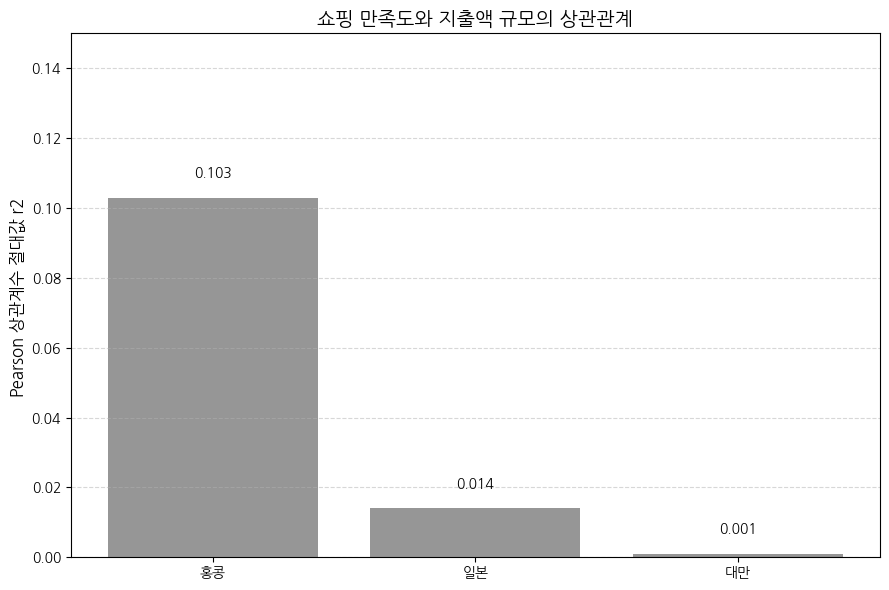

In [ ]:
# ----------------------------------------------------
# 2. Plot: 만족도 vs. 지출 상관관계 - Bar Chart
# ----------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 6))

bars = ax.bar(df_corr_viz['Country'], df_corr_viz['Correlation_r_Abs'], color='#7C7C7C', alpha=0.8)

# Y축 설정 및 레이블
ax.set_ylabel('Pearson 상관계수 절대값 r2 ', fontsize=12)
ax.set_title('쇼핑 만족도와 지출액 규모의 상관관계', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# 데이터 레이블 추가
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}',
                ha='center', va='bottom', fontsize=10, color='black')

add_labels(bars)

plt.ylim(0, 0.15)
plt.tight_layout()

핵심 인사이트


- 약한 연관성 입증: 모든 국가에서 쇼핑 만족도와 총 지출액 간의 상관계수가 $\mathbf{0.1}$ 이하로 매우 낮게 나타남.

- 전략적 결론 (만족도 $\rightarrow$ 실용성): 이는 쇼핑 지출이 '기분이 좋아서 더 쓰는 것' ($\text{만족}$)보다는, '필요한 품목을 목적성 있게 구매하는 것'에 의해 이루어짐을 의미함. 따라서 마케팅은 단순한 재미나 만족감을 높이는 것보다, 상품의 가격 경쟁력, 접근성, 그리고 다양성을 보장하는 실용적이고 구매 용이성에 초점 필요.

# ----------------------------------------------------
# 2. Plot: 산점도 (최종 검증) 생성
# ----------------------------------------------------

In [ ]:
# 1. 시각화 데이터 직접 정의 (이전 분석 결과 반영)
# K: 천 원 단위. Avg_Exp_K는 2024년 1인당 평균 지출액, Growth_Rate는 2019년 대비 성장률
data = {
    'Country': ['홍콩', '대만', '일본'],
    'Avg_Exp_K': [1793, 1491, 989],
    'Growth_Rate': [67.2, -30.7, -56.4]
}
df_viz_scatter = pd.DataFrame(data)

# 데이터 정렬 (구매력 내림차순으로 정렬)
df_viz_scatter = df_viz_scatter.sort_values(by='Avg_Exp_K', ascending=False).reset_index(drop=True)

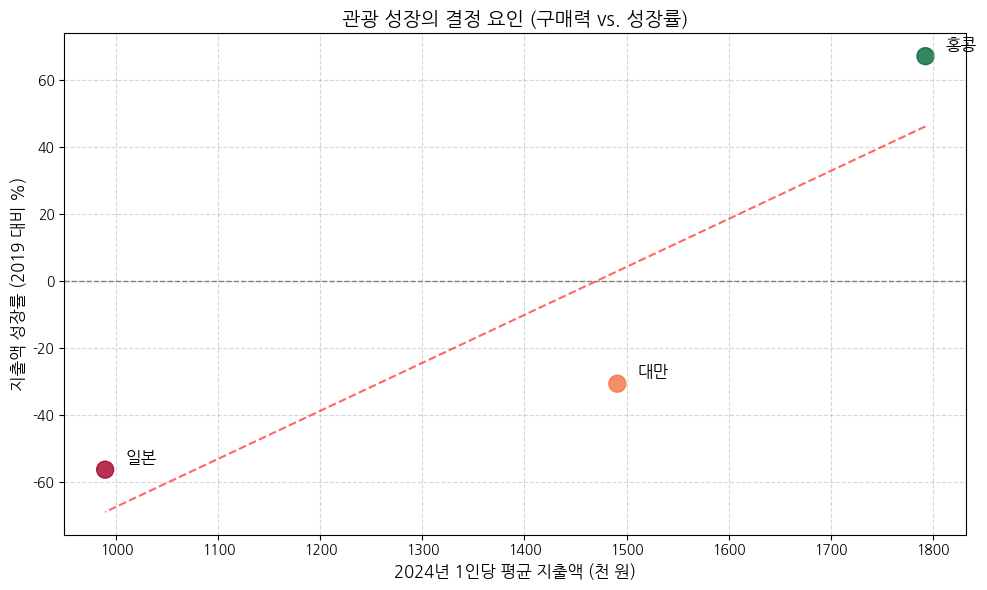

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# 산점도 그리기 (색상은 성장률에 따라 변화)
scatter = ax.scatter(df_viz_scatter['Avg_Exp_K'], df_viz_scatter['Growth_Rate'],
                     s=150, c=df_viz_scatter['Growth_Rate'], cmap='RdYlGn', alpha=0.8)

# 레이블 추가 (국가명)
for i, row in df_viz_scatter.iterrows():
    # 홍콩 (고지출/고성장)을 강조하기 위해 레이블 위치 조정
    ax.text(row['Avg_Exp_K'] + 20, row['Growth_Rate'] + 2, row['Country'],
            fontsize=12, ha='left')

# 축 및 제목 설정
ax.set_title('관광 성장의 결정 요인 (구매력 vs. 성장률)', fontsize=14)
ax.set_xlabel('2024년 1인당 평균 지출액 (천 원)', fontsize=12)
ax.set_ylabel('지출액 성장률 (2019 대비 %)', fontsize=12)

# 상관관계 선 추가 (데이터의 강한 선형 관계를 시각화)
z = np.polyfit(df_viz_scatter['Avg_Exp_K'], df_viz_scatter['Growth_Rate'], 1)
p = np.poly1d(z)
ax.plot(df_viz_scatter['Avg_Exp_K'], p(df_viz_scatter['Avg_Exp_K']), "r--", alpha=0.6)

# 그리드 및 0% 선 추가 (성장/하락 구분선)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

핵심 인사이트


-  관광 성장은 '여성 비율' 그 자체($\text{Japan}$)가 아니라, '여성 비율이 높은 시장의 실질적인 구매력(지출액 규모)'에 의해 결정.

- 성공 사례 (홍콩): $\mathbf{2024}$년 지출액이 가장 높았던 홍콩($\mathbf{1,793}$천 원)이 $\mathbf{2019}$년 대비 가장 높은 지출액 성장률($\mathbf{+67.2}\%$)을 기록함. 이는 고(高) 지출 여성 시장이 곧 고(高) 성장 시장임.

- 전략적 결론: 구매력($\text{Avg Exp}$)이 높은 홍콩 시장을 최우선 타겟으로 삼아 지출 규모를 더욱 심화하고, $\text{일본}$처럼 구매력이 낮은 시장에는 고가치 상품 유도 전략을 펼쳐 $\mathbf{1}$인당 지출액을 높여야 함